 # BZCAT Study 

There is an association analysis run for each of the monthly models. One of the objectives of running all the months is to find transient sources, for which blazars are an obvious candidate. Here I examine all BZCAT associations, both for the 6-year source list, and for each of the 72 single-month sky models. The association analysis for each sky model has a special check for all sources which are associated with the BZCAT catalog. Given that AGN catalogs often have sources in common, this analysis searches the list of associations for each source to see if any, not necessariy the one with the highest probability, corresponds to BZCAT. All such are saved for later reference. 

This analysis uses both this information, and extracts the detailed monthly information for each 6-year source, to allow comparisons.

#### Load stuff

Read in the "bzcat_summary" files generated by the association analysis for each month, and for the 6-year model. Those files, indexed by the name, have the association info, the name of the 6-year source, and TS of the fit. 



In [1]:
%matplotlib inline
from IPython import display
from uw.like2.analyze import transientinfo as ti; reload(ti)
%time ta = ti.Analysis()
%time si= ti.BZCATinfo(ta, quiet=True)

CPU times: user 1min 22s, sys: 5.49 s, total: 1min 27s
Wall time: 1min 32s
loading SourceInfo with 1219 sources
Source S966-512 not detected in any month
Source P86Y0205 not detected in any month
Source P86Y1420 not detected in any month
277 monthly names are in the 6-year list of 584 names
CPU times: user 19.6 s, sys: 82 ms, total: 19.7 s
Wall time: 22.4 s


This loaded the list of associations from the 6-year run.

## Study of Variability and Localization resolution with 6-year sources
First I examine the monthly fits for the 1219 6-year BZCAT-associated sources. It is interesting to apply the same analysis as for the pulsars, given that most AGNs are not constant. 

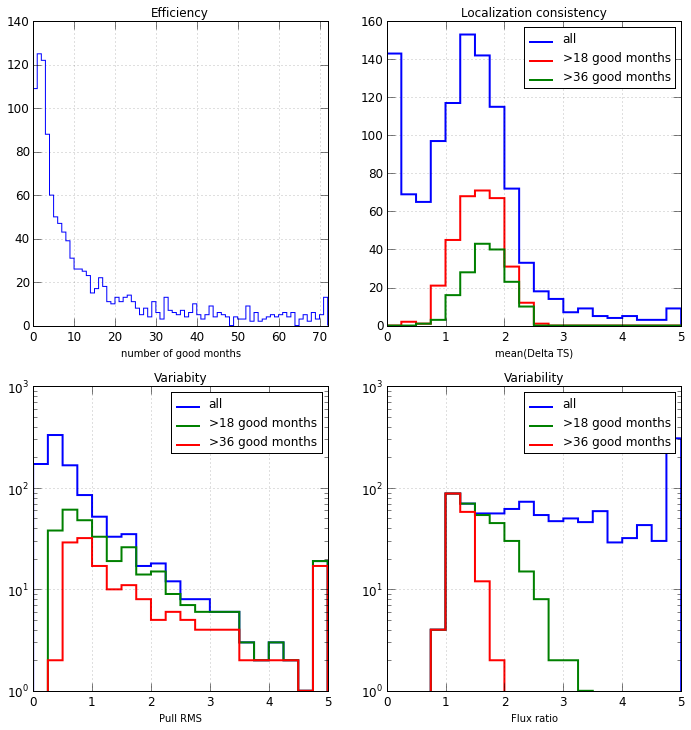

In [2]:
si.bzcat_plots();

The __upper left__ plot shows the monthly frequency distribution, depending on the efficiency and the flux distribution. In the subsequent histograms, I show the distribution for all, and subsets of having more than 18, and 36 monthly measurements.  The __upper right__ plot is a histogram of the means of the association TS values for the months. It is ideally 2.0. The __lower left__ plot is of the RMS of the pulls for the flux measuremnts. For a constant source,this should be 1.0.  In this case, the variability is an important factor. It is surprising that there are so many close to 1.0, however. The __lower right__ plot shows the ratio of the measured monthly flux to the 6-year average. This should be 1.0. For less than 100% efficiency, the selection effect biases it, but variability also affects this.

The next plot shows the association TS distribution for the 6-year measurements. The expected exponential is plotted.

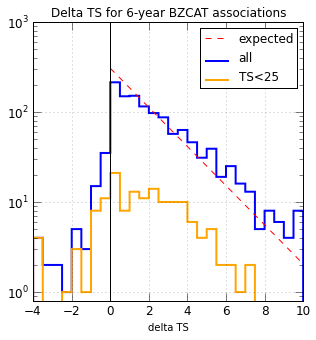

In [3]:
ti.delta_ts_figure(si.bz6,'Delta TS for 6-year BZCAT associations' );

Note the T<25 subset. For weak sources, statistical fluctions affect the measurment of the shape of the likelihood function, causing the deviation from the expected exponential, and the large negative tail. Also note that the slope of the exponential is not quite right: a fit to all AGN associations gives an error scaling factor of 1.07.

### Transient BZCAT associations
Now we turn to look at the BZCAT associations of the "transient" sources found in the monthly sky models. That is, the sources found by PGWAVE or the TS map analysis. 
I compare it with the set of names from the 6-year model.

Idealy, there should be no overlap, since the 6-year sources are input to the source finding procedure. This is not the case for two reasons:
1. The 6-year source was discarded by mistake
2. The new source is close enough to get associated; there is no check to require only one association with a given source.
The next plot shows the number of associations per month, and the subset which are not in the 6-year list:

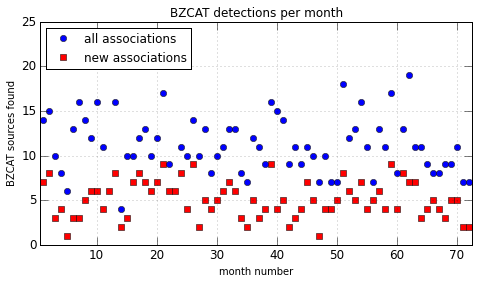

In [4]:
si.monthly_detections_plot();

The new associations are mostly detected in a single moonth. The following table compares the two sets. 

In [5]:
display.HTML(si.monthly_frequency_table())

,1,2,3,4,5,6,7,8,9,10,11,12,13
in 6y,202,36,21,8,4,2,1,0,0,0,1,0,0
new,262,39,4,1,0,0,0,1,0,0,0,0,0


Using the BZCAT list of sources has the benefit of easy access to the blazar type. For the "new" set, here is the integral distribution, and a table of the totals:

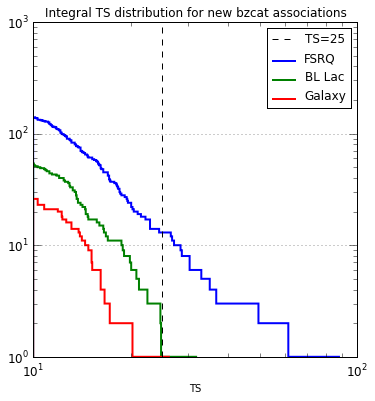

In [6]:
si.cumulative_ts();

In [7]:
display.HTML(si.agn_type_table())

,number
BL Lac,67
FSRQ,186
galaxy,32
unknown,22


The blazar classification is of course based on the radio properties, so the strong correlation is a good indicator that the associations are good. Since most of the TS values are small, we need to be careful to check for possible contamination of spurrious sources.

The next plot is such a check, the distribution of the association likelihood. While clearly not consistent with the expected exponential, it is similar to the low-TS sources in the 6-year list.

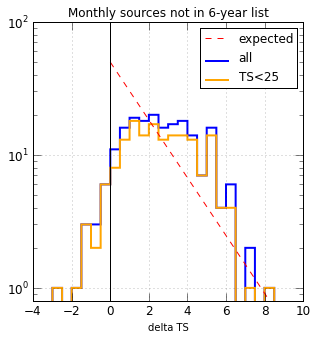

In [8]:
reload(ti)
# make a list of deltats for the new ones
newnames = set(si.bzdf[si.bzdf.notin6y].index)
d = dict()
for bzm in  si.bzm: #loop over months
    for name in set(bzm.index):#.intersection(newnames):
        if name not in si.bz6.index: continue
        rec = bzm.ix[name]
        if (rec.ts<10 or np.isnan(rec.ts) 
            or np.isnan(rec.deltats)): continue
        d[name]=dict(adeltats=rec.deltats,ts=rec.ts)
t = pd.DataFrame(d).T
ti.delta_ts_figure(t, title='Monthly sources not in 6-year list');

## Check all associations
The BZCAT study only looked at that subset of the associations. For completeness, here is a check for all, with a look at the association likelihood.

In [9]:
t = []
for i,mi in enumerate(si.ta.monthinfo):
    t.append(mi.df[(mi.df.transient) & (mi.df.aprob>0.8)&(mi.df.locqual<8)
                  & (np.abs(mi.df.glat)>10) &(mi.df.ts>10)])
tdf =pd.concat(t) 
cats =set(tdf.acat)
ncat = dict()
for cat in cats:
    n = sum(tdf.acat==cat)
    if n>2: ncat[cat] = n 
pd.DataFrame(ncat, index=['number associated']).T

,number associated
agn,9
bllac,90
bzcat,503
cgrabs,318
crates,553
pulsar_big,39
pulsar_lat,35
qso,82
starbursts,13


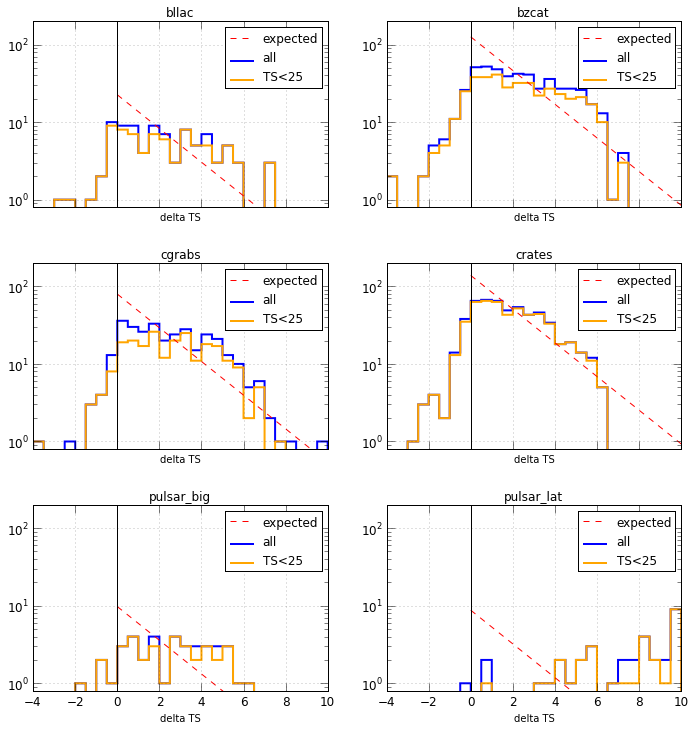

In [10]:
reload(ti)
fig, axx = plt.subplots(3,2, sharex=True, figsize=(12,12))
plt.subplots_adjust(hspace=0.3)
for ax,cat in zip(axx.flatten(), 'bllac bzcat cgrabs crates pulsar_big pulsar_lat'.split()):
    ti.delta_ts_figure(tdf[tdf.acat==cat], ax=ax, title=cat, ymax=200)

In this case, the "bzcat" entries are only those for which it had the highest probability. Of interest is are the pulsar_lat entries, which are clearly incorrect, as the pulsars are in the model. But the values are consistent with a few that I explictly looked at, sources that were near the actual pulsar, and close enough to also get tagged. 